<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L12_1_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **K-평균 군집화 모델 구현**

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

iris = datasets.load_iris()
features = iris.data

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

model = KMeans(n_clusters=3, random_state=0)
model.fit(features_scaled)

KMeans(n_clusters=3, random_state=0)

In [2]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
new_obs = [[0.8, 0.8, 0.8, 0.8]]
model.predict(new_obs)

array([2], dtype=int32)

In [6]:
model.transform(new_obs)

array([[2.00748231, 3.45674596, 0.83965108]])

In [7]:
model.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

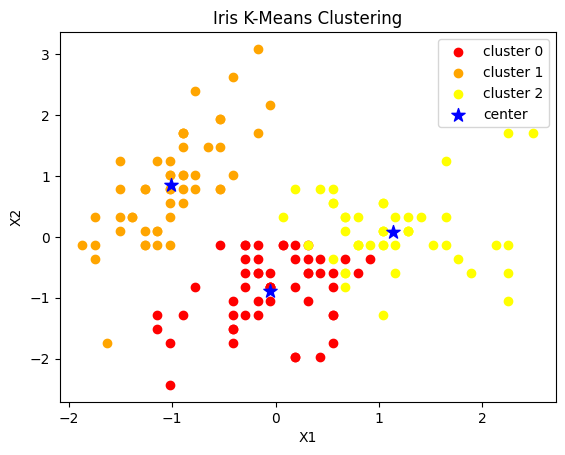

In [11]:
import numpy as np
import matplotlib.pyplot as plt

index_0 = np.where(model.labels_ == 0)
index_1 = np.where(model.labels_ == 1)
index_2 = np.where(model.labels_ == 2)

plt.scatter(features_scaled[:, 0][index_0], features_scaled[:, 1][index_0], c= 'red', label = "cluster 0")
plt.scatter(features_scaled[:, 0][index_1], features_scaled[:, 1][index_1], c= 'orange', label = "cluster 1")
plt.scatter(features_scaled[:, 0][index_2], features_scaled[:, 1][index_2], c= 'yellow', label = "cluster 2")

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, marker='*', c='blue', label = 'center')

plt.title('Iris K-Means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'best')
plt.show()

### **엘보우 방법 적용**

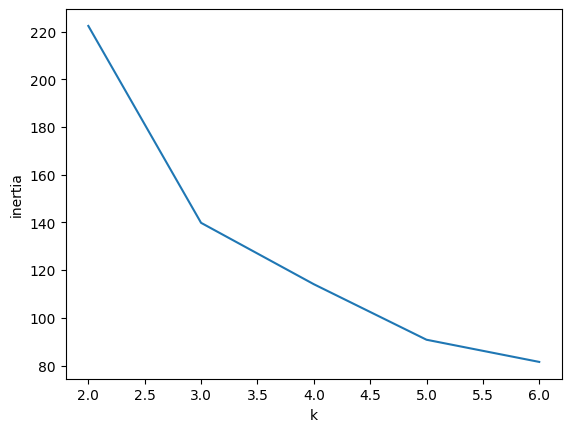

In [13]:
inertia = []
for k in range(2,7):
  model = KMeans(n_clusters = k, random_state = 0)
  model.fit(features_scaled)
  inertia.append(model.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

### **연습 문제**
- 아래의 코드를 참고하여 K-평균 군집화를 수행하되 최적의 K값을 찾아 군집화를 실시하고 결과를 시각화하시오.

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

titanic = pd.read_csv('titanic.csv')
titanic = titanic.dropna()

features = titanic[["Age", "Fare"]]

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

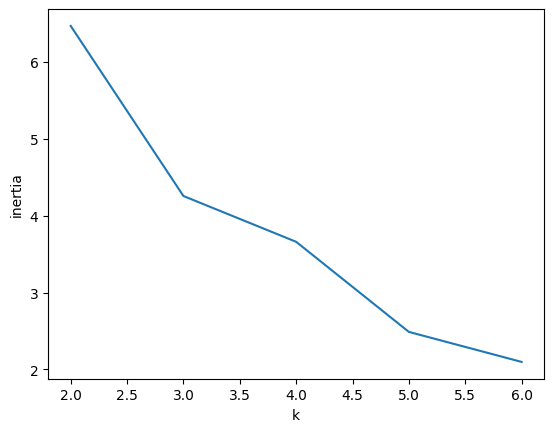

In [23]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2,7):
  model = KMeans(n_clusters = k, random_state = 0)
  model.fit(features_scaled)
  inertia.append(model.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

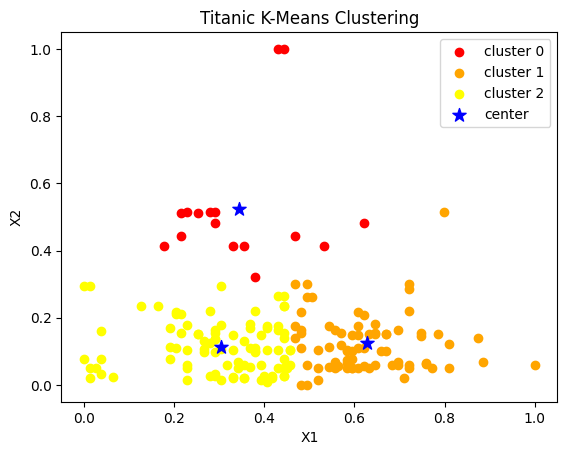

In [27]:
# 적절한 k값을 3으로 판단 됩니다.

model = KMeans(n_clusters=3, random_state=0)
model.fit(features_scaled)

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

index_0 = np.where(model.labels_ == 0)
index_1 = np.where(model.labels_ == 1)
index_2 = np.where(model.labels_ == 2)

plt.scatter(features_scaled[:, 0][index_0], features_scaled[:, 1][index_0], c= 'red', label = "cluster 0")
plt.scatter(features_scaled[:, 0][index_1], features_scaled[:, 1][index_1], c= 'orange', label = "cluster 1")
plt.scatter(features_scaled[:, 0][index_2], features_scaled[:, 1][index_2], c= 'yellow', label = "cluster 2")

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, marker='*', c='blue', label = 'center')

plt.title('Titanic K-Means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'best')
plt.show()